<a href="https://colab.research.google.com/github/AlbertoEscrivaCastro/03MIAR_04_B_2023-24_Algoritmos-de-Optimizacion/blob/main/Retos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto VC-1

## Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales

In [ ]:
# Criba de Erastótenes
import numpy as np

def criba_erastotenes( n ):
  st_primos = set(range( 1 , n+1 ))

  for i in range( 2 , int( np.sqrt( n ) // 1 ) ):
    if i in st_primos:
      for j in range( i , int(n // i) + 1 ):
        st_primos.discard( i * j )

  return st_primos

In [ ]:
print( criba_erastotenes( 10000 ) )

{1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217,

# Reto VC-2

## Opción 2: Implementa una solución del problema de las Torres de Hanoi para un número arbitrario n de fichas.

In [ ]:
# Torres de Hanoy
def torres_hannoi( fichas , desde , hasta ):
  # Se inicializan las variables.
  columnas      = { 1 , 2 , 3 }
  movimientos   = []

  # Por eliminación se obtiene cuál es la columna que se usará como pivote.
  pivote        = columnas.copy()
  pivote.remove( desde )
  pivote.remove( hasta )
  pivote        = pivote.pop()

  # Se calculan los movimientos.
  if fichas == 1:
    movimientos = [ ( desde , hasta ) ]

  else:
    movimientos.extend( torres_hannoi( fichas-1 , desde  , pivote ) )
    movimientos.extend( torres_hannoi(        1 , desde  , hasta  ) )
    movimientos.extend( torres_hannoi( fichas-1 , pivote , hasta  ) )

  return movimientos

In [ ]:
torres_hannoi(4,1,3)

[(1, 2),
 (1, 3),
 (2, 3),
 (1, 2),
 (3, 1),
 (3, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 1),
 (3, 1),
 (2, 3),
 (1, 2),
 (1, 3),
 (2, 3)]

### Reto

Implemente el código del descenso por gradiente para la regresión lineal.

In [1]:
import numpy as np
import seaborn as sns
import bokeh.plotting as bp
import matplotlib.pyplot as plt
import sympy as sym

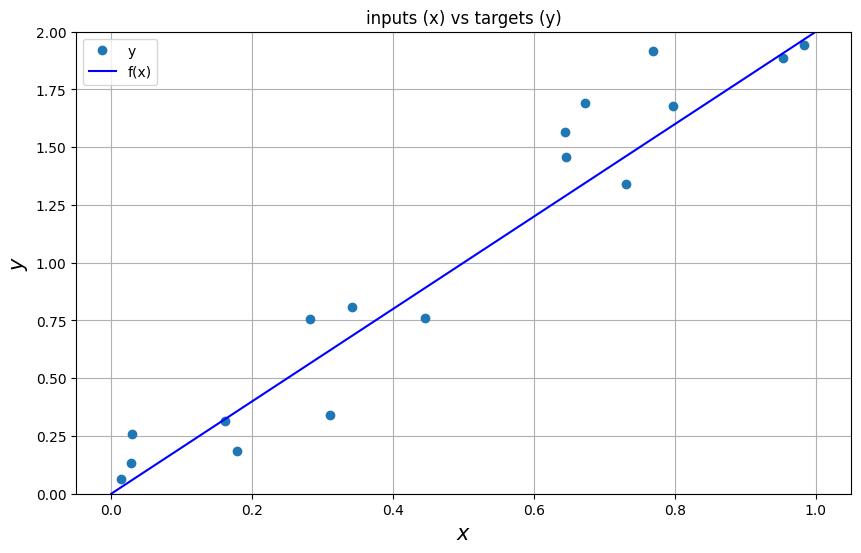

In [2]:
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

In [3]:
sym.var('x_var w1 w0')

recta_x = sym.Array( w1*x + w0 )

# Error Cuadrático Medio
error = sym.simplify( np.sum( ( y - recta_x )**2 ) / len( x ) )
print('Error Cuadrático Medio')
display(error)

Error Cuadrático Medio


1.0*w0**2 + 0.910299721954831*w0*w1 - 1.89732708158658*w0 + 0.318379849935104*w1**2 - 1.34968725713837*w1 + 1.4664761670621

In [4]:
def grad_f( funcion , X ):
  # Para generalizar esta función, se pondrá de entrada la función polinómica, de la que
  # se calculará el gradiente, en formato simbólico en vez del punto en el que se evaluará.
  # Los valores del punto deben estar en el mismo orden que la lista de variables que se genera.
  # Alfabéticamente por nombre de variable.

  # Las variables sobre las que derivar se obtienen de entrada para que se obtengan
  # posiciones cero para variables que se hayan perdido en derivadas anteriores
  # pues también hand e tenerse en cuenta.
  try   : _ = iter( X )
  except: X = [ X ]
  X         = sym.Array( X )

  # Ya con todas las variables implicadas, se obtienen las derivadas de cada componente
  # en función de cada una de las variables.
  gradiente = []

  for j, xj in enumerate( X ):
    df_dxj  = funcion.diff( xj )

    gradiente.append( df_dxj )

  return sym.Array( gradiente )

In [5]:
def evalua_list_func( funcion , punto , X ):
  try   : _       = iter( punto )
  except: punto   = [ punto ]
  punto           = sym.Array( punto )

  # Se convierten los nombres de variables en strings.
  X_str           = list()

  for variable in X:
    X_str.append( str( variable ) )

  X_str.sort()
  Xn              = dict(zip( X_str , punto ))
  funcion_Xn    = np.zeros( funcion.shape , dtype = float )

  for i , func_i in enumerate( funcion ):
    funcion_Xn[i] = func_i.subs( Xn )

  return np.array( funcion_Xn ) , Xn

In [6]:
def grad_desc( funcion , Xn , gamma , tol , maxit ):
  # En caso de que el punto inicial no venga definido en un array se convierte en uno.
  try   : _       = iter( Xn )
  except: Xn      = [ Xn ]
  Xn              = sym.Array( Xn )

  # Primero se obtienen todas las variables de todas las componentes de la función y se ordenan.
  X   = list( funcion.free_symbols )
  X.sort( key = lambda xi: xi.name)

  # Se calcula el gradietne de forma simbólica, una única vez para que valga para todas
  # las iteraciones.
  gradiente       = grad_f( funcion , X )

  # Se inicializa el paso de forma que la primera vez siemproe sea mayor que la tolerancia buscada.
  paso            = 2 * tol
  iteraciones     = 0

  while paso >= tol and iteraciones <= maxit:
    iteraciones += 1

    gradiente_Xn , Xn_dict = evalua_list_func( gradiente , Xn , X )
    variacion     = gamma * gradiente_Xn
    Xn            = Xn - variacion

    try:
      paso        = np.linalg.norm( variacion )
    except:
      paso        = abs( variacion )

  if paso > tol:
    print(f"Se ha alcanzado el límite máximo de iteraciones permitido.\nEl valor obtenido es {Xn_dict}.")
  else:
    print(f"Tras {iteraciones} iteraciones se ha obtenido el resultado {Xn_dict}.")

  return Xn

In [7]:
# Se definen los parámetros de la ejecución del algoritmo y se ejecuta.
# Generamos un punto aleatorio inicial
X0    = [ np.random.uniform( -5 , 5  ) , np.random.uniform( -5 , 5 ) ]
gamma = 0.1
tol   = 1e-12
maxit = 1e4

min_1 = grad_desc( error , X0 , gamma , tol , maxit )

Tras 1352 iteraciones se ha obtenido el resultado {'w0': -0.0460321806969988, 'w1': 2.18542464091283}.
